<a href="https://colab.research.google.com/github/mateuszGrabiec/175-IC-machine-lerning/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



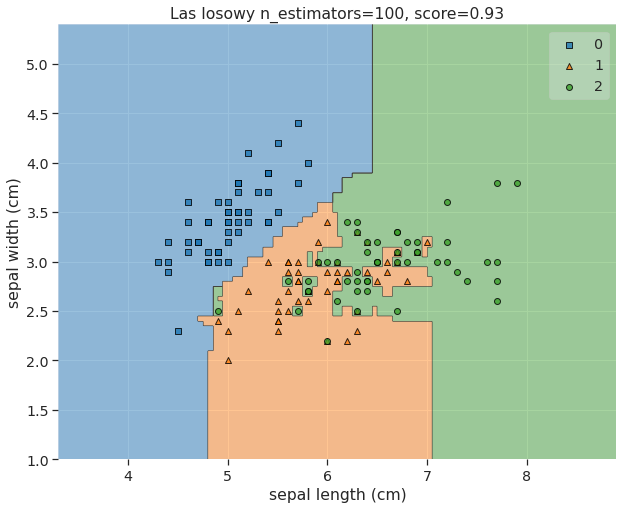

0.9736842105263158


             feature  importance
1   sepal width (cm)       0.033
0  sepal length (cm)       0.100
3   petal width (cm)       0.397
2  petal length (cm)       0.471


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(font_scale=1.3)
np.random.seed(42)

from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])

data = data[:,[0,1]]
target = df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}')

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)

classifier.fit(data, target)

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(data, target, classifier)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(f'Las losowy n_estimators=100, score={np.round(classifier.score(data, target),2)}')
plt.show()

# 1
from sklearn.model_selection import train_test_split
import plotly.express as px

data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

clf = RandomForestClassifier(max_depth = 2,random_state = 0)
clf.fit(X_train, Y_train)

clf.predict(X_test.iloc[0].values.reshape(1, -1))
clf.predict(X_test[0:10])


score = clf.score(X_test, Y_test)
print(score)

# 2
max_depth_range = list(range(1, 6))
accuracy = []
for depth in max_depth_range:
    
    clf = RandomForestClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)
# 3
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=True)
fig = px.bar(importances,
             x='feature',
             y='importance',
             color='importance',
             barmode='stack')
fig.show()
print(importances)